In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


ModuleNotFoundError: No module named 'seaborn'

In [2]:
#creating pandas data frame and adding header to the data
data = pd.read_csv('/home/panther/Downloads/adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'])

# Data Pre-processing

In [3]:
#checking for null values
data.replace(' ?',np.nan,inplace =True)
data.isnull().sum()
#we cant replace workclass,occupation,native-country with their mean or meadian so we are deleting them
data =  data.dropna()

#droping duplicate rows
data = data.drop_duplicates()

#encoading target variabe
le = preprocessing.LabelEncoder()
le.fit(data['target'].values)
data['target'].replace(data['target'].values,le.transform(data['target'].values),inplace=True)

#checking columns having more than 80% single values
fx = lambda x : max(data[x].value_counts())/data.shape[0]>.80
single_value_columns = list(filter(fx,data.columns))

# droping single value columns
data = data.drop(single_value_columns,axis=1)

# EDA

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,target
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,45,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,50,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,80,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Male,40,1
...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Female,45,1
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Female,20,1
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,1


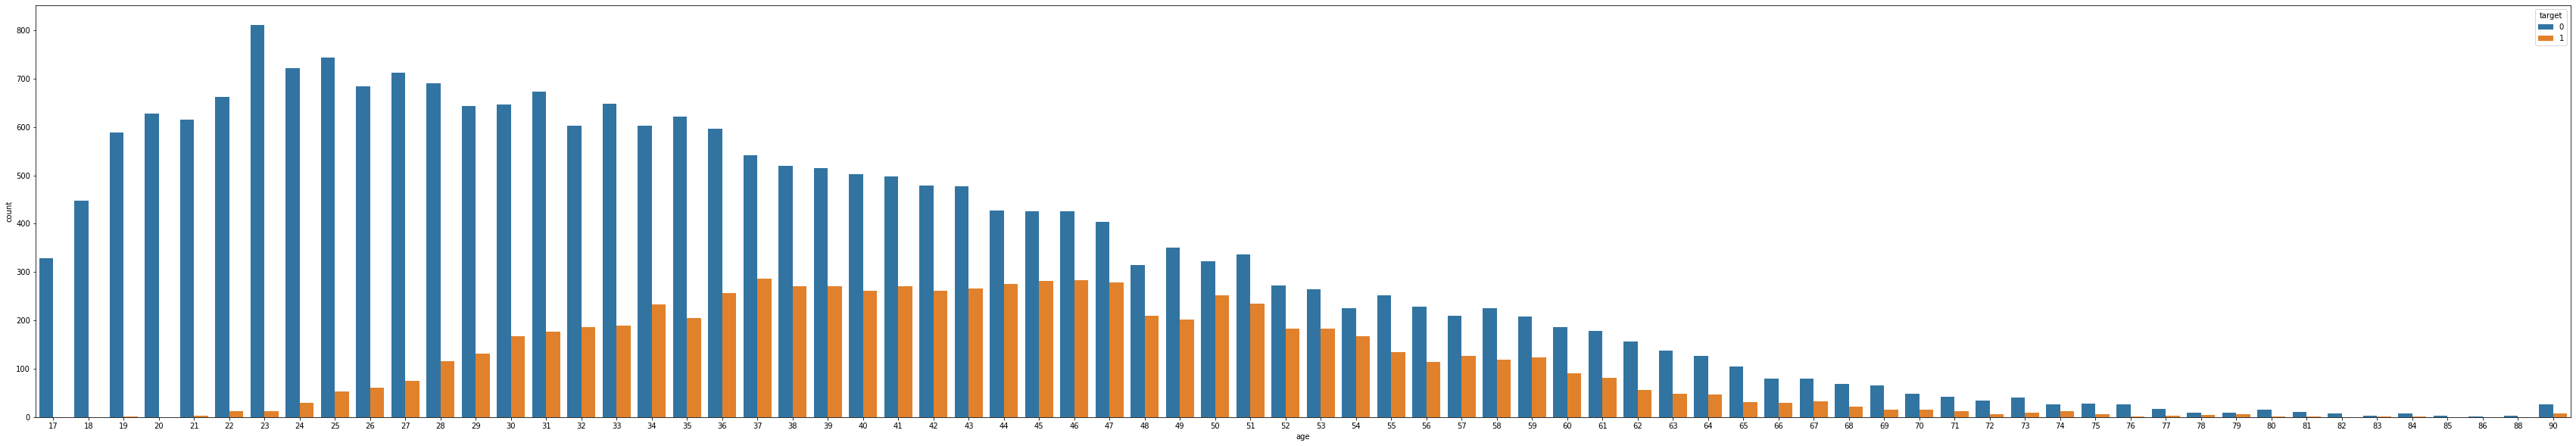

In [4]:
#lets see how age impact on the salary
plt.figure(figsize=(60,10))
sns.countplot('age',hue='target',data=data)
#87% of the people whose age is in between 30-60 having salary more than 50k
data[(data['age'].between(30,60))&(data['target']==1)]

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='count'>

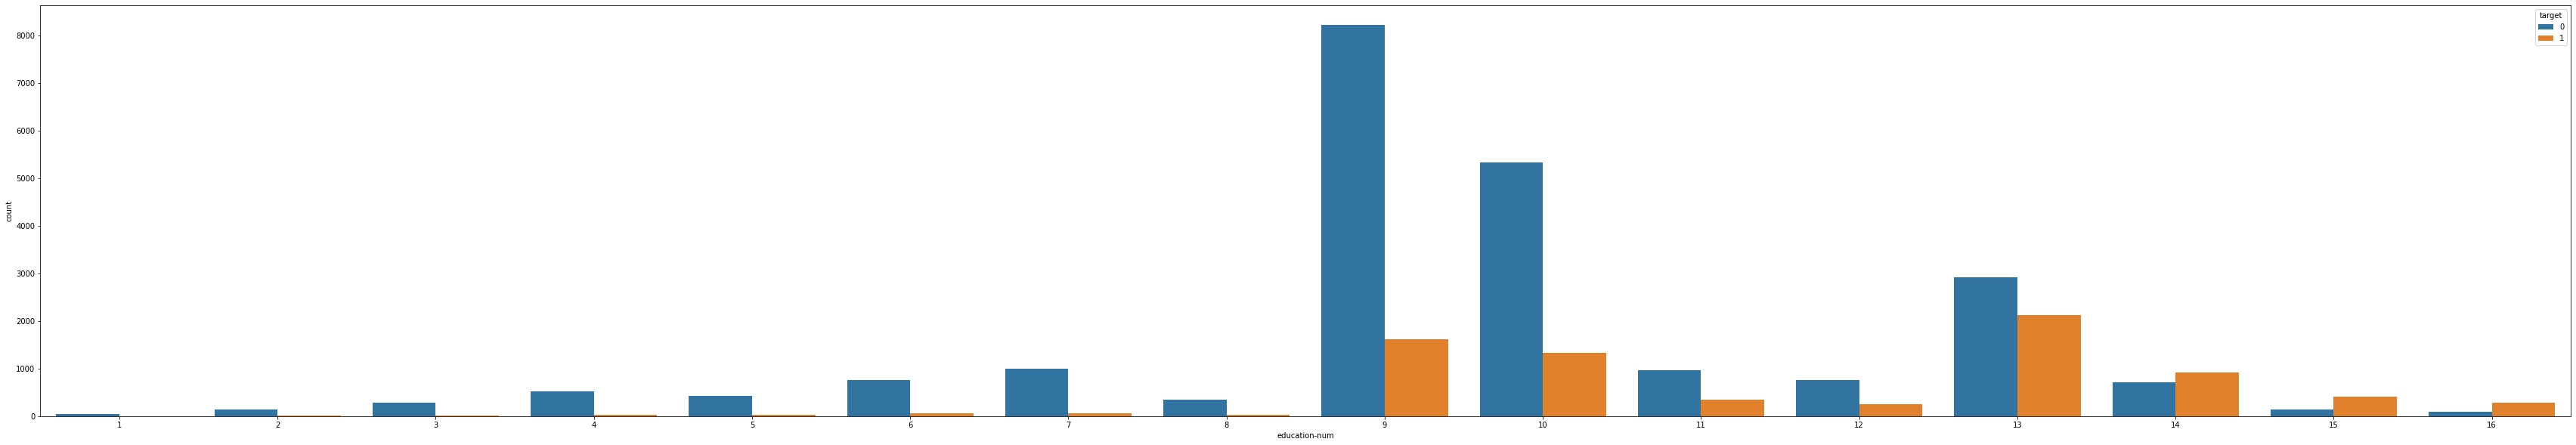

In [5]:
#lets see how education varies the salary
plt.figure(figsize=(60,10))
sns.countplot('education-num',hue='target',data=data)
#its clearly showa that more number of years you study you vl get more salary

<AxesSubplot:xlabel='occupation', ylabel='count'>

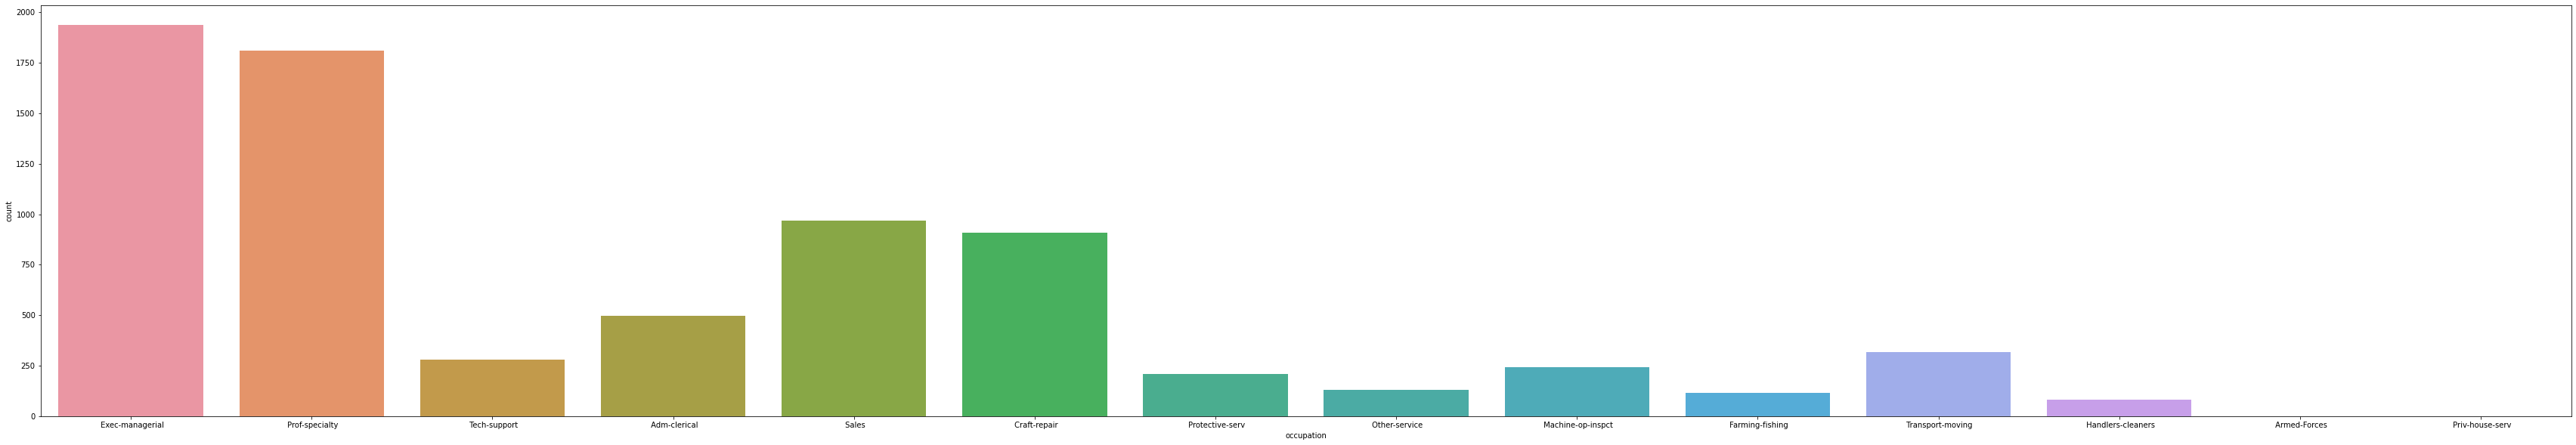

In [6]:
#lets see which are the top 2 occupations to get more salary
data_m = data[data['target']==1]
plt.figure(figsize=(60,10))
sns.countplot(x='occupation',data=data_m)

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

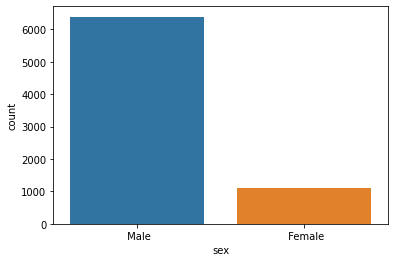

In [7]:
#lets see who vl get more salary male or female
sns.countplot('sex',data=data_m)
# aha there are 85% people are men among who earn more than 50k salary

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital-status', ylabel='count'>

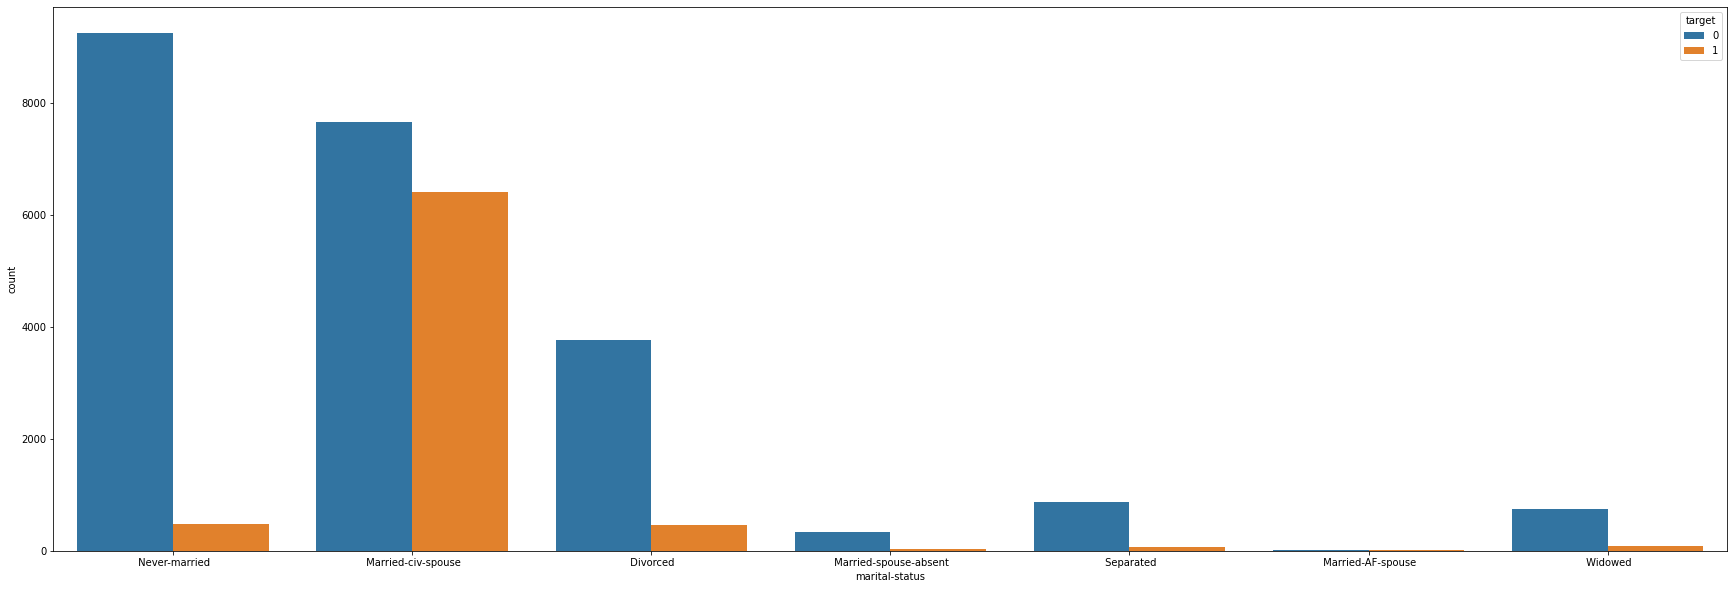

In [8]:
#Is marital-status affects salary 
plt.figure(figsize=(30,10))
sns.countplot('marital-status',hue="target",data=data)
# 85% who are Married-civ-spouse are earning more than 50k

In [4]:
#creating dummy variables for catogorial columns
cato_columns = data.columns[data.dtypes == 'object']
data = pd.get_dummies(data,columns=cato_columns)

#taking target feature out from the data set
y = data['target']
X= data.drop('target',axis=1)

#splitiing data set into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# concatenate our training data back together to perform downsample majority classes
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
below_50 = X[X.target==0]
above_50 = X[X.target==1]
# downsample majority
above_50_downsampled = resample(below_50,replace = False,n_samples = len(above_50),random_state = 27) 

# combine minority and downsampled majority
downsampled = pd.concat([above_50_downsampled, above_50])

# # checking counts
downsampled.target.value_counts()


# trying logistic regression again with the undersampled dataset

y_train = downsampled.target
X_train = downsampled.drop('target', axis=1)

# feature selection based on RandomForestClassifier

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.7495686794956868
precision_score = 0.8353301510866393
 
DecisionTreeClassifier - 
recall_score = 0.7182481751824817
precision_score = 0.8353301510866393
 
RandomForestClassifier - 
Precision= 0.8196342773536676
recall= 0.7685467816854679


# feature selection based on LogisticRegression

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(LogisticRegression())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.7798274717982747
precision_score = 0.8374494831209588
 
DecisionTreeClassifier - 
recall_score = 0.7485069674850697
precision_score = 0.8374494831209588
 
RandomForestClassifier - 
Precision= 0.8204521058503019
recall= 0.760185799601858


# feature selection based on Decision tree

In [9]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(DecisionTreeClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.7689449236894492
precision_score = 0.8344182752649801
 
DecisionTreeClassifier - 
recall_score = 0.7216987392169874
precision_score = 0.8344182752649801
 
RandomForestClassifier - 
Precision= 0.8153021393596839
recall= 0.7625746516257466
